# 1. Introduction
Harmful use of alcohol causes more than 5% of the global disease burden. The death of more than [3 million people](https://www.who.int/news-room/detail/21-09-2018-harmful-use-of-alcohol-kills-more-than-3-million-people-each-year--most-of-them-men) a year is caused by the substance. Simultaneously it is source of a [1344 billion dollar industry](https://www.statista.com/statistics/696641/market-value-alcoholic-beverages-worldwide/), and an important cultural factor. This makes it a highly important, and highly complex, matter for regulators which have to take into account many aspects when creating policies.

The goal of this notebook is to aggregate different alcohol control policies to understand which are the most common and test the correlation between alcohol consumption and different alcohol control policies


## 1.1 Importing Libraries 

In [178]:
# import libraries
from preprocess_data import *
import os
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import folium
import geopandas
import warnings
from folium import plugins
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

## 1.2 Definning file paths

In [2]:
#original_file_PATH_definitions
projectdata_PATH = "../data/projectdata/"
dataprocessed_PATH = "../data/dataprocessed/"

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## 1.3 Defining functions used to preprocess the project data

In order to keep this notebook as clean as possible, the functions where written in the python package `preprocess_data`

1. We have divided all the countries in the database into eight parts according to the United Nations geographical division criteria.
2. This is because we take into account that countries in the same region have similar political conditions, living habits and cultural background, such as countries in the EU, while countries in different regions are quite different in these aspects.
3. Therefore, our subsequent analysis will be based on the results of the following country segmentation.

## 1.4 DataSets Overview

**DataSet 1. Pure alcohol consumption, litres per capita, age 15+**

* Indicator full name: Pure alcohol consumption, litres per capita, age 15+

* Unit: litres per capita

* Dimensions:

* Country (COUNTRY) 

* Supranational group of countries (COUNTRY_GRP)

* Sex (SEX)

* Year of measure (YEAR)

* Years data is available: 1970—2015

In [4]:
display(HTML('<iframe frameborder="0" class="whoWidget" onload="(function (){if(!document.getElementById(\'ifr\')){var s=document.createElement(\'script\');s.type=\'text/javascript\';s.id=\'ifr\';s.src=\'https://gateway.euro.who.int/Scripts/libs/iframeResizer/iframeResizer.min.js\';document.getElementsByTagName(\'head\')[0].appendChild(s);}})();" src="https://gateway.euro.who.int/en/indicators/visualization-embed/?indId=18314&visId=19443" style="width: 100%;"></iframe>'))

D:\Soft\Conda\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


**DataSet 2.Age limits - Alcohol service/sales by country**

* Data type: Count
* Topic: Risk factors
* Rational: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition:The legal age limit for on-premise service of alcoholic beverages is defined as the age at which a person can be served alcoholic beverages on premises in a country, i.e. alcoholic beverages cannot be served to a person under this age. The legal age limit for off-premise sales of alcoholic beverages is defined as the age at which a person can be sold alcoholic beverages off premises in a country, i.e. alcoholic beverages cannot be sold to a person under this age.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Short name: Age limits on-/off-premise sales

Short name:Age limits on-/off-premise service

Total countries:194

In [5]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1144\'></iframe><br>'))

**DataSet 3.License requirement for alcohol production and retail sales**

* Short name: Licensing
* Data type: Categorical
* Topic: Risk factors
* Rationale: One first needs to be aware of a country's laws and policies regarding alcohol before one can establish whether these influence the level and patterns of alcohol consumption in the population. Thus, the legal status of alcohol production, distribution and consumption is an important indicator.
* Definition: Licensing is defined as the partial government control of production, and sale, wholesale and distribution of alcoholic beverages which requires licensing, as well as of import and export.
* Disaggregation: Alcoholic beverage type
* Method of estimation: The national authorities of a given country respond to the Global Survey on Alcohol and Health.
* Expected frequency of data dissemination:Periodic
* Expected frequency of data collection:Periodic

Retail sales by country

In [6]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1179\'></iframe><br>'))

In [7]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://apps.who.int/gho/data/node.main.A1178\'></iframe><br>'))

**DataSet 4. Human Development Reports: GDP, Education Index, Unemployment, Median age, Human Development Index**

* Short name: HDR
* Data type: Numerical
* Rationale: Several socio-economical factors can influence the alcohol consumption of a population. For this reason we have chosen several indicators used by the UN development agency, to see what influence they have and how their influence compares to alcohol control policies.
* Method of estimation: Answer from statistical department of the respective governments.
* Expected frequency of data dissemination: Periodic
* Expected frequency of data collection: Periodic


In [8]:
display(HTML('<iframe id=\'rightframe\' name=\'leftiframe\' width="70%" src=\'http://hdr.undp.org/en/data\'></iframe><br>'))

# 2. Preprocessing
## 2.1 Clean 4 simpler dataset: Tax, Liscence, Community_action, Health_warning 

1. Turning Yes/No to 1/0
2. Leave out "No data" rows

In [9]:
preprocess_data_file(projectdata_PATH + "Tax.csv", dataprocessed_PATH + "Tax.csv")
preprocess_data_file(projectdata_PATH + "Licence_production.csv", dataprocessed_PATH + "Licence_production.csv")
preprocess_data_file(projectdata_PATH + "Licence_retail.csv", dataprocessed_PATH + "Licence_retail.csv")
preprocess_data_file(projectdata_PATH + "Community_actions.csv", dataprocessed_PATH + "Community_actions.csv")
preprocess_data_file_one(projectdata_PATH + "Health_warning.csv", dataprocessed_PATH + "Heatlh_warning.csv")

In [10]:
# print every file after cleaning
df_tax = pd.read_csv(dataprocessed_PATH + "Tax.csv", sep=',')
df_tax.head(10)

,Country,Year,Tax on beer,Tax on wine,Tax on spirits
0,Albania,2016,1,1,1
1,Algeria,2016,1,1,1
2,Andorra,2016,1,1,1
3,Angola,2016,1,1,1
4,Antigua and Barbuda,2016,0,0,0
5,Argentina,2016,1,0,1
6,Armenia,2016,1,1,1
7,Australia,2016,1,1,1
8,Austria,2016,1,0,1
9,Azerbaijan,2016,1,1,1


In [11]:
df_liscence_production = pd.read_csv(dataprocessed_PATH + "Licence_production.csv", sep=',')
df_liscence_production.head(10)

,Country,Year,Licence for beer production,Licence for wine production,Licence for spirits production
0,Albania,2016,1.0,1.0,1.0
1,Algeria,2016,0.0,0.0,0.0
2,Andorra,2016,1.0,1.0,1.0
3,Angola,2016,1.0,1.0,1.0
4,Antigua and Barbuda,2016,0.0,1.0,1.0
5,Argentina,2016,0.0,0.0,0.0
6,Armenia,2016,1.0,1.0,1.0
7,Austria,2016,0.0,0.0,0.0
8,Azerbaijan,2016,1.0,1.0,1.0
9,Bahamas,2016,1.0,0.0,1.0


In [12]:
df_liscence_retail = pd.read_csv(dataprocessed_PATH + "Licence_retail.csv", sep=',')
df_liscence_retail.head(10)

,Country,Year,Licence for beer retail sales,Licence for wine retail sales,Licence for spirits retail sales
0,Albania,2016,1,1,1
1,Algeria,2016,1,1,1
2,Andorra,2016,1,1,1
3,Angola,2016,1,1,1
4,Antigua and Barbuda,2016,1,1,1
5,Argentina,2016,0,0,0
6,Armenia,2016,0,0,0
7,Austria,2016,0,0,0
8,Azerbaijan,2016,1,1,1
9,Bahamas,2016,1,1,1


In [13]:
df_community_actions = pd.read_csv(dataprocessed_PATH + "Community_actions.csv", sep=',')
df_community_actions.head(10)

,Country,Year,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,Government support for community programmes,Government support for provision of information,Government support for data dissemination,Government support for research studies
0,Afghanistan,2016,0,0,0,0,0,0,0,0
1,Albania,2016,0,0,0,0,0,1,1,0
2,Algeria,2016,0,0,0,0,0,0,0,0
3,Andorra,2016,0,0,0,0,0,0,0,0
4,Angola,2016,0,0,1,0,1,0,1,0
5,Antigua and Barbuda,2016,0,0,1,0,0,1,0,0
6,Argentina,2016,1,0,1,1,0,1,1,0
7,Armenia,2016,0,0,0,0,0,0,0,0
8,Australia,2016,1,0,0,1,0,0,0,0
9,Austria,2016,0,0,0,0,0,0,0,0


In [14]:
df_health_warning = pd.read_csv(dataprocessed_PATH + "Heatlh_warning.csv", sep=',')
df_health_warning.head(10)

,Country,Year,Health warning labels on alcohol containers
0,Albania,2016,1
1,Algeria,2016,0
2,Andorra,2016,0
3,Angola,2016,0
4,Antigua and Barbuda,2016,0
5,Argentina,2016,1
6,Armenia,2016,0
7,Australia,2016,0
8,Austria,2016,0
9,Azerbaijan,2016,0


## 2.2 Clean public_use dataset, change text to valuse

replacing text value according to below:

ban                                               1

partial restriction                             0.5

voluntary/self-restricted                       0.3 #parameter that can be changed

no restrictions                                  0

leave out nodata rows:

No data        

### Print out dataset information

In [15]:
preprocess_public_use_data(projectdata_PATH + "Public_use.csv", dataprocessed_PATH + "Public_use.csv")
df_public_use = pd.read_csv(dataprocessed_PATH + "Public_use.csv", sep=',')
df_public_use.head(10)

,Country,Year,Restrictions on alcohol use in educational buildings,Restrictions on alcohol use in government offices,Restrictions on alcohol use in healthcare establishments,Restrictions on alcohol use in leisure events,Restrictions on alcohol use in parks and streets,Restrictions on alcohol use in public transport,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces
0,Afghanistan,2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,Albania,2016,1.0,0.5,1.0,0.3,0.0,0.3,1.0,1.0,1.0
2,Algeria,2016,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Andorra,2016,0.5,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5
4,Angola,2016,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5
5,Antigua and Barbuda,2016,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0,0.3
6,Argentina,2016,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
7,Armenia,2016,1.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8,Australia,2016,0.3,0.3,0.3,0.5,0.5,0.5,0.3,0.5,0.3
9,Austria,2016,0.3,0.3,0.3,0.5,0.5,0.5,0.3,0.5,0.3


## 2.3 Clean age_limit data set,  change text to value

Using max min scale, (0, age value, Total ban=50) ~ (0,1)

None              0

15  16  17  18  19  20  21  25

Total ban          50

Subnational 2      drop

No data  21       drop


In [16]:
#preprocess_age_limits(projectdata_PATH + "Age_limits.csv", dataprocessed_PATH + 'Age_limits.csv')
df_age_limits = pd.read_csv(dataprocessed_PATH + 'Age_limits.csv', sep=',')
df_age_limits.head()

,Country,Year,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits
0,Afghanistan,2016,1.00,1.00,1.00,1.00,1.00,1.00
1,Albania,2016,0.36,0.36,0.36,0.36,0.36,0.36
2,Algeria,2016,0.36,0.36,0.36,0.36,0.36,0.36
3,Andorra,2016,0.36,0.36,0.36,0.36,0.36,0.36
4,Angola,2016,0.36,0.36,0.36,0.36,0.36,0.36


## 2.4 Process countries data

In [17]:
# Add latitude and longitude into country list
process_countries(projectdata_PATH + "Country_list.csv", dataprocessed_PATH + "Country_list_lat_long_final.csv")
df_country_location = pd.read_csv(dataprocessed_PATH + 'Country_list_lat_long_final.csv', sep=',')
df_country_location.head()

Successfully Converted: 173


,Number,Country,iso2,iso3,latitude,longitude,Region,Religion
0,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam
1,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs
2,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs
3,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian
4,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam


## 2.5 Processing and data agglomeration of HDR factors

In [18]:
#create dataframes for each factor
df_hdi = pd.read_csv(projectdata_PATH + "Human_Development_Index.csv")
df_unempl = pd.read_csv(projectdata_PATH + "Unemployment.csv")
df_median = pd.read_csv(projectdata_PATH + "Median_age.csv")
df_gdp = pd.read_csv(projectdata_PATH + "GDP.csv")
df_edu = pd.read_csv(projectdata_PATH + "Education_Index.csv")

In [19]:
# creates one DataFrame with all policies
co = pd.read_csv(projectdata_PATH + "Country_list.csv").drop(labels='Number', axis=1)
df_hdr = df_hdi.set_index(['Country','Year']).join([df_unempl.set_index(['Country','Year']), 
                                                  df_median.set_index(['Country','Year']),
                                                  df_gdp.set_index(['Country','Year']),
                                                  df_edu.set_index(['Country','Year'])],
                                                  how='outer')
df_hdr = df_hdr.reset_index('Year')
df_hdr = df_hdr.join(co.set_index(['Country']))
df_hdr = df_hdr.drop(labels='Year', axis='columns')
df_hdr = df_hdr.rename({'iso3':'Code'}, axis=1)
df_hdr = df_hdr[:-1]
df_hdr.head(10)

,HDI_2016,"Unemployment, total (% of labour force)",Median age (years),Gross domestic product (GDP) per capita (2011 PPP $),Education Index,Code,Region,Religion
Country,,,,,,,,
Afghanistan,0.494,8.8,17.3,1803,0.41,AFG,Asia-Pacific Group,Islam
Albania,0.782,15.2,36.2,11356,0.742,ALB,Eastern European Group,Islam
Algeria,0.753,10.2,27.5,13921,0.663,DZA,African Group,Islam
Andorra,0.856,..,..,..,0.714,AND,Western European and Others Group,Roman Catholic
Angola,0.577,7.7,16.4,5972,0.487,AGO,African Group,indigenous beliefs
Antigua and Barbuda,0.778,..,30.7,21013,0.676,NaN,NaN,NaN
Argentina,0.822,8.4,30.8,18585,0.814,ARG,Latin American and Caribbean Group,Roman Catholic
Armenia,0.749,18,33.9,8190,0.749,ARM,Eastern European Group,Armenian Apostolic
Australia,0.938,5.7,37.4,44493,0.929,AUS,Western European and Others Group,Roman Catholic


In [20]:
#standardizing names as used for policies
as_list = df_hdr.index.tolist()
idx = as_list.index('Korea (Democratic People\'s Rep. of)')
as_list[idx] = 'Democratic People\'s Republic of Korea'
idx = as_list.index('Korea (Republic of)')
as_list[idx] = 'Republic of Korea'
idx = as_list.index('Moldova (Republic of)')
as_list[idx] = 'Republic of Moldova'
idx = as_list.index('The former Yugoslav Republic of Macedonia')
as_list[idx] = 'Republic of North Macedonia'
idx = as_list.index('United Kingdom')
as_list[idx] = 'United Kingdom of Great Britain and Northern Ireland'
idx = as_list.index('United States')
as_list[idx] = 'United States of America'
idx = as_list.index('Congo (Democratic Republic of the)')
as_list[idx] = 'Democratic Republic of the Congo'
idx = as_list.index('Eswatini (Kingdom of)')
as_list[idx] = 'Eswatini'
df_hdr.index = as_list

## 2.6 Data agglomeration for the policies

In [21]:
# creates one DataFrame with all policies
df_policy_rough = df_age_limits.set_index(['Country','Year']).join([df_community_actions.set_index(['Country','Year']), 
                                                  df_health_warning.set_index(['Country','Year']),
                                                  df_liscence_production.set_index(['Country','Year']),
                                                  df_liscence_retail.set_index(['Country','Year']),
                                                  df_tax.set_index(['Country','Year']),
                                                  df_public_use.set_index(['Country','Year'])],
                                                  how='outer')
df_policy_rough = df_policy_rough.reset_index('Year')
df_policy_rough = df_policy_rough.drop(labels='Year', axis='columns')
#df_policy_rough = df_policy_rough.rename({'iso3':'Code'}, axis=1)
df_policy_rough.head(10)

,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,...,Tax on spirits,Restrictions on alcohol use in educational buildings,Restrictions on alcohol use in government offices,Restrictions on alcohol use in healthcare establishments,Restrictions on alcohol use in leisure events,Restrictions on alcohol use in parks and streets,Restrictions on alcohol use in public transport,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.00,1.00,1.00,1.00,1.00,1.00,0.0,0.0,0.0,0.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Albania,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,0.5,1.0,0.3,0.0,0.3,1.0,1.0,1.0
Algeria,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Andorra,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,0.5,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.5
Angola,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,1.0,0.0,...,1.0,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.5
Antigua and Barbuda,0.00,0.00,0.00,0.32,0.32,0.32,0.0,0.0,1.0,0.0,...,0.0,0.3,0.3,0.3,0.0,0.0,0.0,0.3,0.0,0.3
Argentina,0.36,0.36,0.36,0.36,0.36,0.36,1.0,0.0,1.0,1.0,...,1.0,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3
Armenia,0.36,0.36,0.36,0.36,0.36,0.36,0.0,0.0,0.0,0.0,...,1.0,1.0,0.5,1.0,0.0,0.0,1.0,0.0,0.0,1.0
Australia,0.36,0.36,0.36,0.36,0.36,0.36,1.0,0.0,0.0,1.0,...,1.0,0.3,0.3,0.3,0.5,0.5,0.5,0.3,0.5,0.3


### Handling missing values

In [22]:
# drops countries where there is no data
df_policy=df_policy_rough.dropna(axis='rows', how='all')
print('Number of countries with data about policies :', df_policy.shape[0]-3)
#check the types
df_policy.dtypes

Number of countries with data about policies : 173


Age limits off-premise sales for beer                       float64
Age limits off-premise sales for wine                       float64
Age limits off-premise sales for spirits                    float64
Age limits on-premise service for beer                      float64
Age limits on-premise service for wine                      float64
Age limits on-premise service for spirits                   float64
Government support for earmarked funds                      float64
Government support for technical tools                      float64
Government support for training programmes                  float64
Government support for at-risk groups targeted              float64
Government support for community programmes                 float64
Government support for provision of information             float64
Government support for data dissemination                   float64
Government support for research studies                     float64
Health warning labels on alcohol containers     

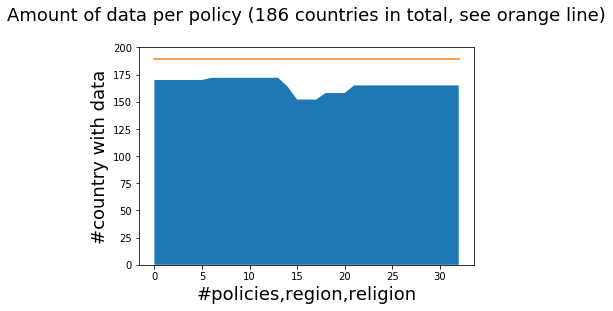

In [23]:
# maybe plot this so that we can visualize it
plt.stackplot(range(len(df_policy.columns)),df_policy.count())
plt.plot(np.linspace(189,189,len(df_policy.columns)), )
plt.xlabel("#policies,region,religion", fontsize=18)
plt.ylabel("#country with data", fontsize=18)
plt.ylim(0, 200)
plt.title('Amount of data per policy (186 countries in total, see orange line)\n', fontsize=18)
plt.show()

We have some countries that are not in our region and religion dataset. This is probbly due to the fact that the regoinal division is from a UN dataset and some smaller countries are not part of the UN

## Imputation
As there is a low number of missing data, we choose to impute the missing values with mean so as to keep as much meaningful data as possible

In [24]:
df_policy.fillna(df_policy.mean(), inplace=True)

D:\Soft\Conda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## 2.7 Joining policies and socio-economic factors in one dataframe

In [25]:
df_all = df_policy.join(df_hdr, how= 'left')
df_all = df_all.dropna(axis=0, subset=['HDI_2016'])
pd.set_option('display.max_rows', df_all.shape[0]+1)
df_all.head(10)

,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,...,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces,HDI_2016,"Unemployment, total (% of labour force)",Median age (years),Gross domestic product (GDP) per capita (2011 PPP $),Education Index,Code,Region,Religion
Afghanistan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.494,8.8,17.3,1803,0.41,AFG,Asia-Pacific Group,Islam
Albania,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.782,15.2,36.2,11356,0.742,ALB,Eastern European Group,Islam
Algeria,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,1.0,0.753,10.2,27.5,13921,0.663,DZA,African Group,Islam
Andorra,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.0,0.5,0.856,..,..,..,0.714,AND,Western European and Others Group,Roman Catholic
Angola,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,1.0,0.0,...,0.0,0.5,0.577,7.7,16.4,5972,0.487,AGO,African Group,indigenous beliefs
Antigua and Barbuda,0.000000,0.000000,0.000000,0.320000,0.320000,0.320000,0.0,0.0,1.0,0.0,...,0.0,0.3,0.778,..,30.7,21013,0.676,NaN,NaN,NaN
Argentina,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,1.0,1.0,...,0.3,0.3,0.822,8.4,30.8,18585,0.814,ARG,Latin American and Caribbean Group,Roman Catholic
Armenia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.0,1.0,0.749,18,33.9,8190,0.749,ARM,Eastern European Group,Armenian Apostolic
Australia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,0.0,1.0,...,0.5,0.3,0.938,5.7,37.4,44493,0.929,AUS,Western European and Others Group,Roman Catholic
Austria,0.363294,0.365647,0.365059,0.376235,0.376235,0.375647,0.0,0.0,0.0,0.0,...,0.5,0.3,0.906,6,43.2,44464,0.852,AUT,Western European and Others Group,Roman Catholic


# 3 Policy analysis

In this section we want to analyse what kind of policies are present in different parts of the world and understand why

## 3.1  Visualize consumptions according to regions

### Merge Country list (Country, Region, Religion, Location) with Consumption

### Preprocess consumption file's country name, Capitalized

In [26]:
process_country_name(projectdata_PATH + "Consumption.csv", projectdata_PATH + "Consumption_namecleaned.csv", 0)

### Split consumption value and 95%CI 

In [27]:
# Preprocess consumption file's
df_consumption = pd.read_csv(projectdata_PATH + "Consumption_namecleaned.csv", header=0, sep=',', names=['Country', '2015-2017', '2009-2011'])
df_consumption.head()
df_consumption['Alcohol_per_capita_2015-2017'], df_consumption['Alcohol_per_capita_2015-2017_95%CI'] = df_consumption['2015-2017'].str.split('[', 1).str
df_consumption['Alcohol_per_capita_2009-2011'], df_consumption['Alcohol_per_capita_2009-2011_95%CI'] = df_consumption['2009-2011'].str.split('[', 1).str

for row in df_consumption.iterrows():
    if isinstance(row[1][2], str):
        row[1][2] = row[1][2].replace("]", "")
    if isinstance(row[1][4], str):
        row[1][4] = row[1][4].replace("]", "")
df_consumption= df_consumption[['Country', 
                                 'Alcohol_per_capita_2015-2017', 
                                 'Alcohol_per_capita_2015-2017_95%CI']]
# 'Alcohol_per_capita_2009-2011', 'Alcohol_per_capita_2009-2011_95%CI'

df_consumption.to_csv(projectdata_PATH + "Consumption_final.csv", index=False, sep=',')

### Create final country list data with location, consumption and region

In [28]:
cdata = pd.merge(df_country_location, df_consumption, on='Country')
cdata.to_csv(projectdata_PATH + "Countries_finaldf.csv", index=False, sep=',')
cdata.head()

,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI
0,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam,0.6,0.6-0.6
1,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs,5,4.9-5.1
2,2,Benin,BJ,BEN,9.30769,2.315834,African Group,indigenous beliefs,1.6,1.5-1.6
3,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3
4,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam,4.9,4.8-5


### Draw the map to visualize the countries' location

In [29]:
# define the world map
world_map = folium.Map()

In [30]:
# change longitude and latitude datatype from str to float
def location_to_float(value):
#     print(value)
    if value!='latitude' and value!='longitude':
        return np.float(value)
    else:
        return np.nan
cdata['latitude'] = cdata['latitude'].apply(location_to_float)
cdata['longitude'] = cdata['longitude'].apply(location_to_float)
cdata.info()
print(cdata.shape)
cdata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 10 columns):
Number                                160 non-null int64
Country                               160 non-null object
iso2                                  159 non-null object
iso3                                  160 non-null object
latitude                              157 non-null float64
longitude                             157 non-null float64
Region                                160 non-null object
Religion                              160 non-null object
Alcohol_per_capita_2015-2017          160 non-null object
Alcohol_per_capita_2015-2017_95%CI    159 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 13.8+ KB
(160, 10)


,Number,Country,iso2,iso3,latitude,longitude,Region,Religion,Alcohol_per_capita_2015-2017,Alcohol_per_capita_2015-2017_95%CI
0,0,Algeria,DZ,DZA,28.033886,1.659626,African Group,Islam,0.6,0.6-0.6
1,1,Angola,AO,AGO,-11.202692,17.873887,African Group,indigenous beliefs,5,4.9-5.1
2,2,Benin,BJ,BEN,9.307690,2.315834,African Group,indigenous beliefs,1.6,1.5-1.6
3,3,Botswana,BW,BWA,-22.328474,24.684866,African Group,Christian,6.2,6.1-6.3
4,4,Burkinafaso,BF,BFA,12.238333,-1.561593,African Group,Islam,4.9,4.8-5


In [31]:
# drop rows without data
cdata = cdata.dropna(axis=0, how='any')
cdata.to_csv(projectdata_PATH + "Countries_dropped.csv", header=None, index=False, sep=',')
cdata.shape

(155, 10)

In [32]:
# Instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# Loop through the consumption data and add each to the incidents feature group

for lat, lng, value in zip(cdata.latitude, cdata.longitude, cdata['Alcohol_per_capita_2015-2017']):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=7, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.4
        )
    )

### Visualize countries' location

In [33]:
# Add incidents to map
# world_map = folium.Map(location=[latitude, longitude], zoom_start=12)
world_map = folium.Map(zoom_start=12)
world_map.add_child(incidents)

### Visualize consumption Regional countries

In [34]:

# let's start again with a clean copy of the map of San Francisco
world_map = folium.Map(zoom_start = 12)

# # instantiate a mark cluster object for the incidents in the dataframe
# incidents = plugins.MarkerCluster().add_to(world_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, consumption in zip(cdata.latitude, cdata.longitude, cdata['Alcohol_per_capita_2015-2017']):
    folium.Marker(
        location=[lat, lng],
        popup=consumption,
        icon=None,
        value=consumption,
    ).add_to(incidents)

# add incidents to map
world_map.add_child(incidents)

## 3.2  Visualize policies

We identify three different means used by states to reduce the alcohol consumption:
* charge money for alcohol production, retail and consumption
* make the population aware of the dangers of alcohol
* restrict access to alcohol

In [35]:
# Grouping policies
groups = ['Charges', 'Awareness','Restrictions']
hierarchy = pd.DataFrame(columns=groups)

In [36]:
#getting lists of columns
age_limits = list(df_policy.columns[:6])
awareness = list(df_policy.columns[7:14])
health = list(df_policy.columns[14:15])
licence = list(df_policy.columns[15:21])
charge = list(df_policy.columns[21:24])
restriction = list(df_policy.columns[24:33])

#grouping relevant columns together
restriction.extend(age_limits)
awareness.extend(health)
charge.extend(licence)

In [37]:
hierarchy['Charges'] = df_policy[charge].mean(axis=1)
hierarchy['Awareness'] = df_policy[awareness].mean(axis=1)
hierarchy['Restrictions'] = df_policy[restriction].mean(axis=1)
hierarchy['Code'] = df_policy['Code']
hierarchy['Region'] = df_policy['Region']
hierarchy['Religion']= df_policy['Religion']
hierarchy.head()

KeyError: 'Code'

In [38]:
# what is the most common approach
hierarchy.mean(axis=0)

Charges         0.815573
Awareness       0.397742
Restrictions    0.493717
dtype: float64

We can observe that in the world the most common alcohol control policy is to charge the consumer an extra fee.
This makes sense as it is the easiest  to enforce also for lower-income countries, who do not have the budget to have government programmes to reduce alcohol consumption

We look a bit closer inside each category

In [39]:
df_policy_mean = df_policy.mean()

In [40]:
bar_restriction = df_policy_mean[restriction].append(df_policy_mean[age_limits])
bar_awareness = df_policy_mean[awareness].append(df_policy_mean[health])
bar_charge = df_policy_mean[charge].append(df_policy_mean[licence])

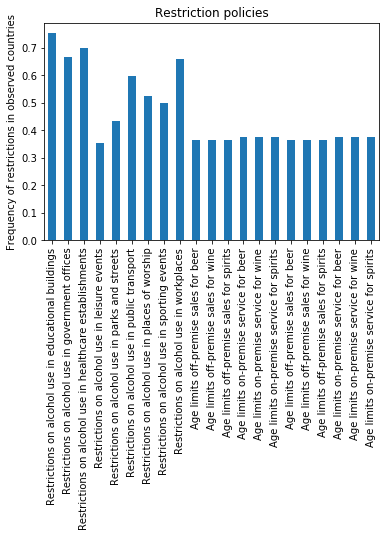

In [41]:
bar_restriction.plot(kind='bar', stacked=True)
plt.title('Restriction policies')
plt.ylabel('Frequency of restrictions in observed countries')
plt.show()

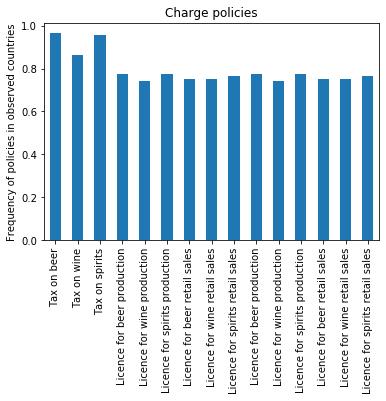

In [42]:
bar_charge.plot(kind='bar', stacked=True)
plt.title('Charge policies')
plt.ylabel('Frequency of policies in observed countries')
plt.show()

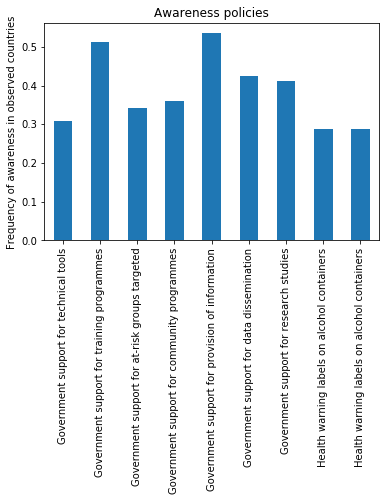

In [43]:
bar_awareness.plot(kind='bar', stacked=True)
# Add title and axis names
plt.title('Awareness policies')
plt.ylabel('Frequency of awareness in observed countries')
plt.show()

Being restriction policies a collection of many different policies there is a difference in the usage by countries of these policies. We can observe though that all these policies are not as popular as taxing alcoholic beverages

## 3.3 Policies by region and religion

we want to do the same analysis but by grouping the policies by country and religion

In [44]:
mean_by_region = hierarchy.groupby('Region').mean()
mean_by_region.plot(kind= 'bar')
plt.ylabel('Frequency of policies')
plt.title('Policies types by region in observed countries')
plt.show()

KeyError: 'Region'

We can observe the popularity of different kind of policies is similar for different regions. The hypothesis made above about awareness being a policy put forward by developed countries does not stand as Western Europe has little difference with the other region in this category

In [45]:
mean_by_religion = hierarchy.groupby('Religion').mean()
mean_by_religion.plot(kind= 'bar', figsize=(20,10))
plt.ylabel('Frequency of policies')
plt.title('Policies types by religion')
plt.show()

KeyError: 'Religion'

We can observe a few differences between countries with different religions
* Islamic and officially atheist (China) coutries have high number of regulations. The former due to the ban of alcohol imposed by the religion, the second due to the autocratic organization of the state
* Christian groups, except Roman Catholic and Orthodox, seem to have fewer restriction policies compared to other countries. 
* Orthodox and non-specified Christian countries have the lowest usage of taxes on alcoholic beverages. This can be due to the high cultural importance of alcohol in many post-soviet nations which are also orthodox

In [158]:
#removing unnecessary columns
df_for_clustering = df_all.drop(columns=['Code', 'Region', 'Religion'])

In [159]:
#correcting the data type
for c in ("HDI_2016", "Unemployment, total (% of labour force)", "Median age (years)", "Gross domestic product (GDP) per capita (2011 PPP $)", "Education Index"):
    df_for_clustering[c] = pd.to_numeric(df_for_clustering[c], errors='coerce')

#fill nan with the mean values
df_for_clustering.fillna(df_for_clustering.mean(), inplace=True)

In [160]:
#normalizing the values
clustering_normalized_df = (df_for_clustering-df_for_clustering.min())/(df_for_clustering.max()-df_for_clustering.min())

In [161]:
#get the aclohol consumption values
alc_consumption = cdata[["Country", "Alcohol_per_capita_2015-2017"]]
alc_consumption = alc_consumption.rename({"Alcohol_per_capita_2015-2017": "Alcohol_per_capita"}, axis="columns")

In [162]:
#join dfs, remove countries with missing values for alcohol consumption 
clustering_normalized_df = clustering_normalized_df.join(alc_consumption.set_index(['Country']))
clustering_normalized_df = clustering_normalized_df.dropna()

In [163]:
#turn alcohol per capita to numeric type
clustering_normalized_df["Alcohol_per_capita"] = pd.to_numeric(clustering_normalized_df["Alcohol_per_capita"], errors='coerce')

In [164]:
clustering_normalized_df.head(10)

,Age limits off-premise sales for beer,Age limits off-premise sales for wine,Age limits off-premise sales for spirits,Age limits on-premise service for beer,Age limits on-premise service for wine,Age limits on-premise service for spirits,Government support for earmarked funds,Government support for technical tools,Government support for training programmes,Government support for at-risk groups targeted,...,Restrictions on alcohol use in public transport,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in sporting events,Restrictions on alcohol use in workplaces,HDI_2016,"Unemployment, total (% of labour force)",Median age (years),Gross domestic product (GDP) per capita (2011 PPP $),Education Index,Alcohol_per_capita
Afghanistan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.238333,0.311594,0.076433,0.012304,0.271978,0.0
Albania,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.3,1.0,1.0,1.0,0.718333,0.543478,0.678344,0.113632,0.728022,5.0
Algeria,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,0.670000,0.362319,0.401274,0.140839,0.619505,0.6
Andorra,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.5,0.841667,0.285771,0.451871,0.180166,0.689560,10.1
Angola,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,1.0,0.0,...,0.0,0.5,0.0,0.5,0.376667,0.271739,0.047771,0.056524,0.377747,5.0
Argentina,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,1.0,1.0,...,0.3,0.3,0.3,0.3,0.785000,0.297101,0.506369,0.190310,0.826923,8.4
Armenia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.663333,0.644928,0.605096,0.080050,0.737637,3.8
Australia,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,1.0,0.0,0.0,1.0,...,0.5,0.3,0.5,0.3,0.978333,0.199275,0.716561,0.465114,0.984890,9.7
Austria,0.363294,0.365647,0.365059,0.376235,0.376235,0.375647,0.0,0.0,0.0,0.0,...,0.5,0.3,0.5,0.3,0.925000,0.210145,0.901274,0.464806,0.879121,11.4
Azerbaijan,0.360000,0.360000,0.360000,0.360000,0.360000,0.360000,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,0.5,0.676667,0.173913,0.490446,0.162901,0.682692,0.5


In [165]:
clustering_normalized_np = clustering_normalized_df.to_numpy(copy=True)

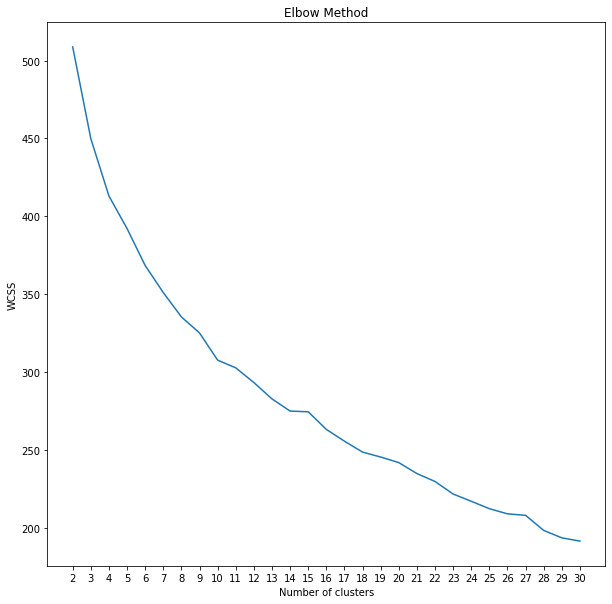

In [166]:
#trying to determine the optimal number of clusters with k-means for all the features with the elbow method
plt.rcParams['figure.figsize'] = [10, 10]
wcss = []
for i in range(2, 31):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(clustering_normalized_np[:,:-1])
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 31), wcss)
plt.xticks(np.arange(2, 31, 1.0))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Due to "the curse of dimensionality", it is difficult to determine the optimal number of clusters for k-means with all the features

Therefore, we will try to find the features that are most indicative of the alcohol consumtion by using linear regression


In [179]:
#running linear regression on features, with the target being alcohol consumption
X = clustering_normalized_np[:,:-1]
y = clustering_normalized_np[:,-1:]

mse = np.zeros(100)
warnings.filterwarnings('ignore')
for a in range(100):
    mse[a] = -np.mean(cross_val_score(Ridge(alpha=a/10.0), X=X, y=y, cv=5, scoring='neg_mean_squared_error'));

In [185]:
#getting weights for the best performing alpha value
best_alpha = np.argmin(mse)
ridge = Ridge(best_alpha/10.0)
ridge.fit(X, y);

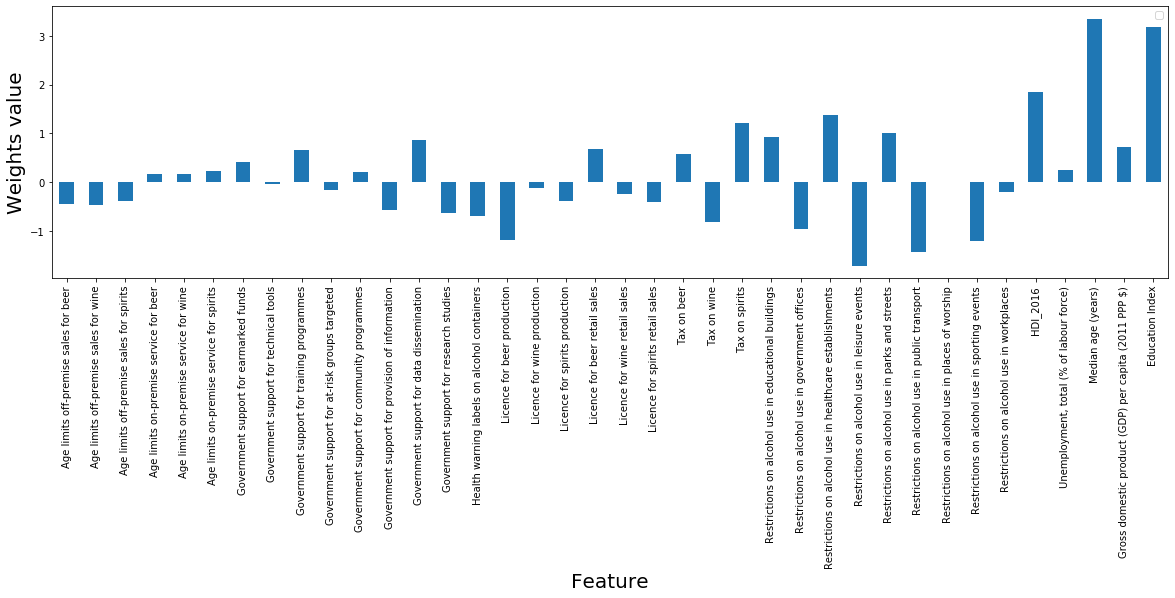

In [186]:
#plotting weights
plt.rcParams['figure.figsize'] = [20, 5]
df = pd.DataFrame({'_': ridge.coef_[0]}, index=clustering_normalized_df.columns.tolist()[:-1])
q = df.plot.bar()
q.set_xlabel('Feature', size=20)
q.set_ylabel('Weights value', size=20);

Alternatively, we can use correlations (as in hw2) to see which features are most indicative of the overall alcohol consumption

In [187]:
#calculating the correlations with alcohol consumption
correlations = clustering_normalized_df.corr().iloc[-1][:-1]
correlations = correlations.sort_values(ascending=False)
correlations = pd.DataFrame(correlations).T
correlations

,Median age (years),Education Index,HDI_2016,Gross domestic product (GDP) per capita (2011 PPP $),Government support for earmarked funds,Government support for data dissemination,Government support for training programmes,Government support for technical tools,Government support for provision of information,Government support for at-risk groups targeted,...,Licence for spirits retail sales,Restrictions on alcohol use in leisure events,Licence for wine retail sales,Restrictions on alcohol use in sporting events,Licence for beer production,Restrictions on alcohol use in public transport,Tax on wine,Restrictions on alcohol use in workplaces,Restrictions on alcohol use in places of worship,Restrictions on alcohol use in government offices
Alcohol_per_capita,0.703091,0.694209,0.644929,0.533721,0.340977,0.268246,0.260449,0.258948,0.195153,0.189443,...,-0.267789,-0.276226,-0.284823,-0.29226,-0.306018,-0.329921,-0.350144,-0.362211,-0.394702,-0.452243


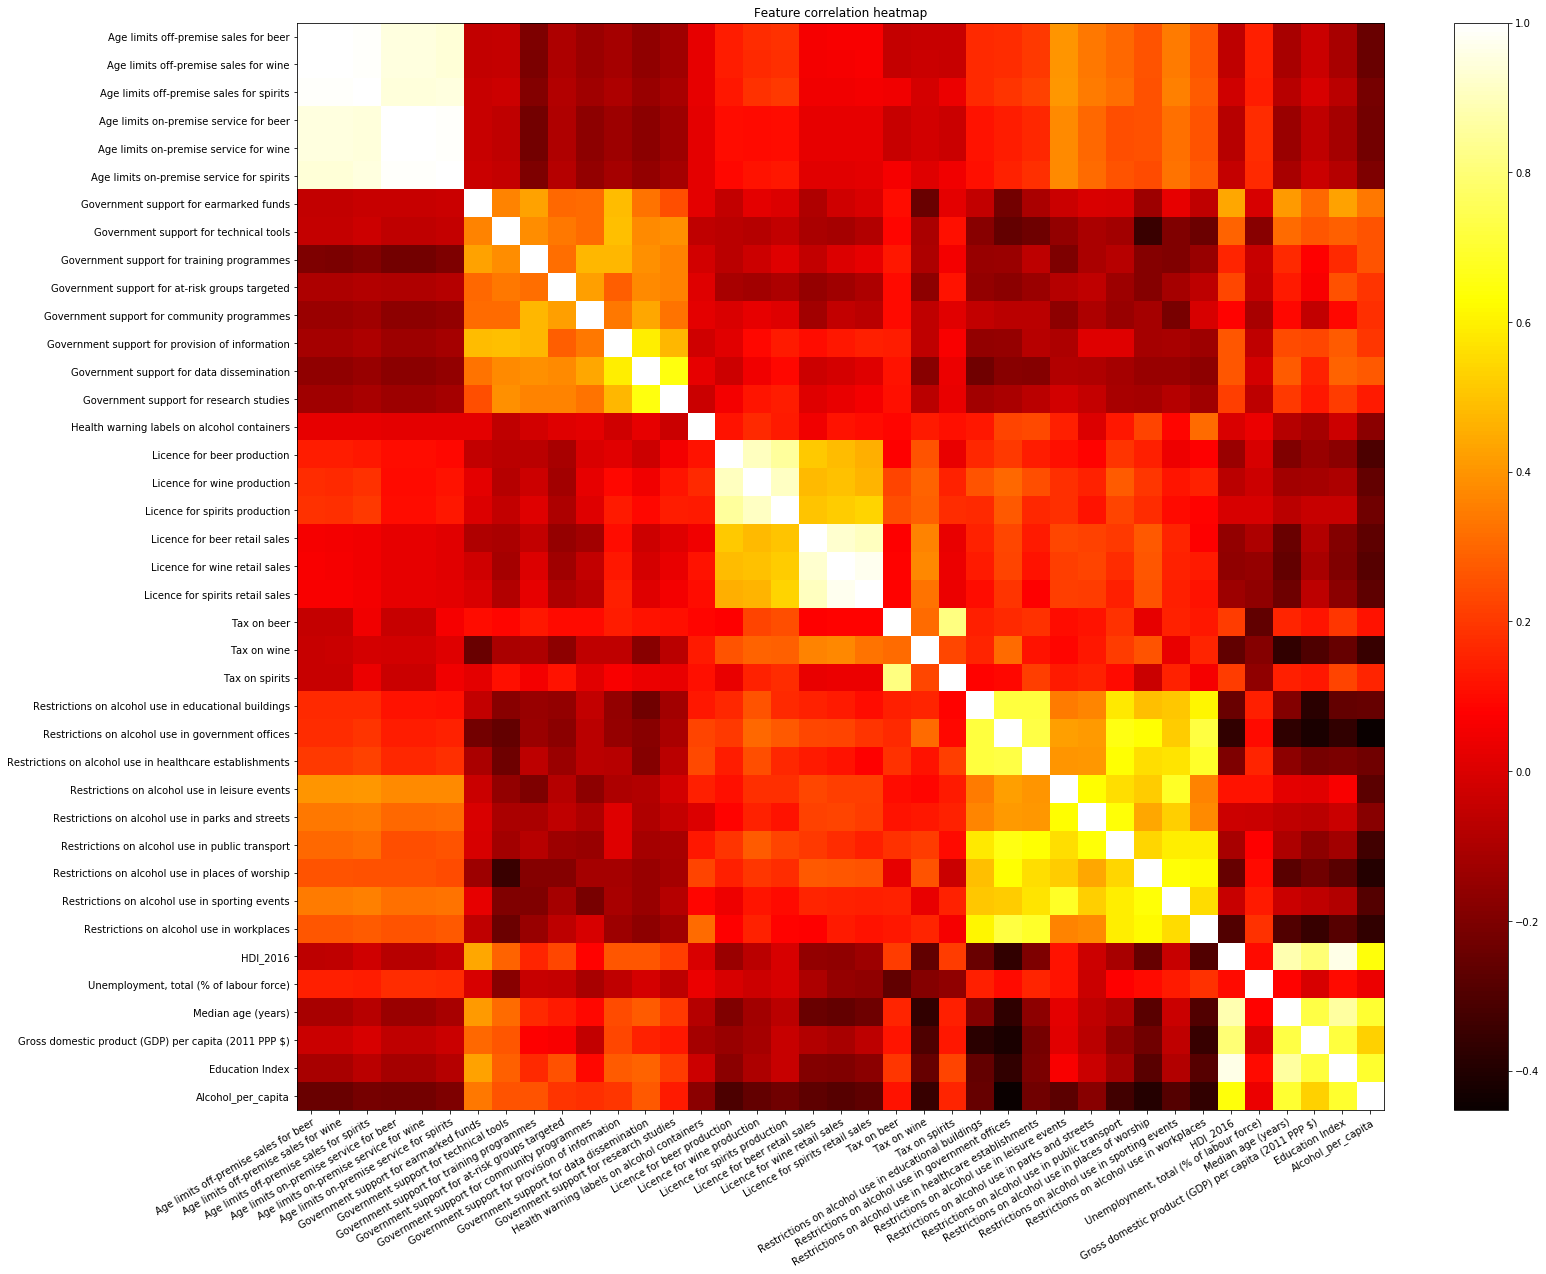

In [188]:
# Plotting the feature correlations heatmap for visualization
corr = clustering_normalized_df.corr()
plt.rcParams['figure.figsize'] = [25, 20]
h = plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar(h)
plt.title("Feature correlation heatmap")
plt.xticks(np.arange(39), corr.index, rotation=30, ha="right", rotation_mode="anchor")
plt.yticks(np.arange(39), corr.index)
plt.show()

The heatmap shows clear groups of policies and restrictions that have higher correlations within the group, indicating that they are not independent, which is to be expected. If there is a restriction on alcohol use in parks and streets in a certain country, it is more likely that it also has a restriction on alcohol use in public transport, while if a licence is necessary for beer production, almost certainly there is one for wine production as well.

The problem is that even if these features have fairly high correlation with alcohol consumption (eg. GDP, Education index and HDI), the strong correlation among themselves mean that there is some redundancy in the information they provide us with. Partially for this reason, the previously generated weights for GDP, for example, are quite low, despite it having one of the highest correlations with the alcohol consumption.

It is also important to note, that the correlation values get as low as -0.45, which represents negative correlation, meaning that the feature in question has an inversed effect on the other feature. For instance, presence of the restriction on alcohol use in government offices seems to indicate a relatively low alcohol consumption in the said country, but also fairly low GDP. We do not know wheather there is a causality between these features, but it is an interesting pattern nonetheless.

In [189]:
#taking features that have |correlation| > 0.3 with alcohol consumption
#in this case, top 5 positively correlating and top 6 negatively correlating features
correlating_features = correlations.columns.tolist()[:5] + correlations.columns.tolist()[-6:]
clustering_normalized_np = clustering_normalized_df[correlating_features].to_numpy(copy=True)

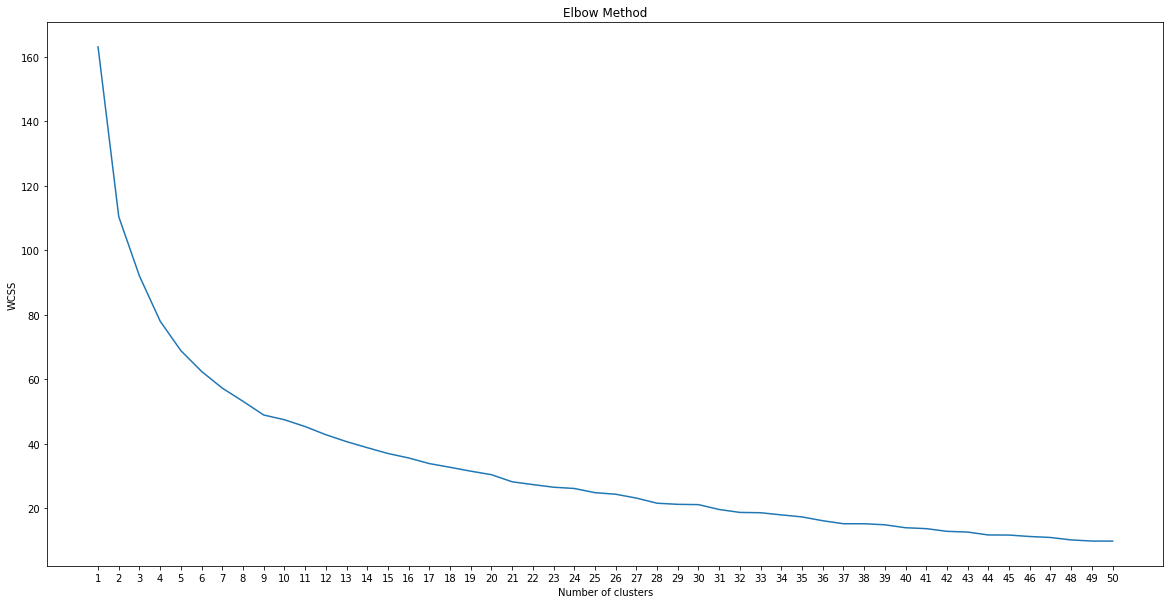

In [174]:
#trying to determine the optimal number of clusters with k-means for the correlating features
plt.rcParams['figure.figsize'] = [20, 10]
wcss = []
for i in range(1, 51):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=10000, n_init=10, random_state=0)
    kmeans.fit(clustering_normalized_np)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 51), wcss)
plt.xticks(np.arange(1, 51, 1.0))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

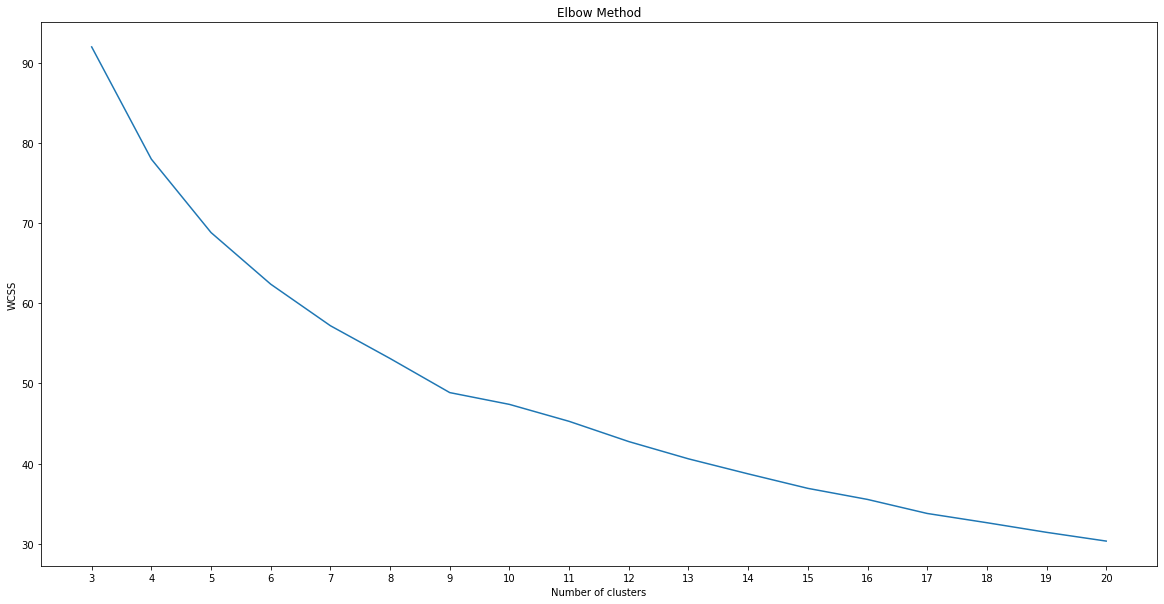

In [66]:
#trying to determine the optimal number of clusters with k-means for the correlating features (zoomed in)
plt.rcParams['figure.figsize'] = [20, 10]
plt.plot(range(3, 21), wcss[2:20])
plt.xticks(np.arange(3, 21, 1.0))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

It appears that 9 clusters would be a reasonable choice

In [67]:
#clustering into 9 groups based on 11 selected features
kmeans = KMeans(n_clusters=9, init='k-means++', max_iter=10000, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(clustering_normalized_np)

In [141]:
#order clusters by average alcohol consumption
clustering_normalized_df["cluster"] = pred_y
ordered_clusters = clustering_normalized_df.groupby(['cluster']).mean().sort_values(by=['Alcohol_per_capita']).index.tolist()
clustering_normalized_df["cluster"] = clustering_normalized_df["cluster"].apply(lambda x : ordered_clusters[x])

In [142]:
#preparing df for visualization
clustering_df = clustering_normalized_df[["Alcohol_per_capita", "cluster"]]
clustering_df = clustering_df.join(df_all['Code'])
clustering_df = clustering_df[~clustering_df.index.duplicated(keep='first')]
clustering_df = clustering_df.rename(columns={'Code':'iso_a3'})
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world.merge(clustering_df, on='iso_a3')

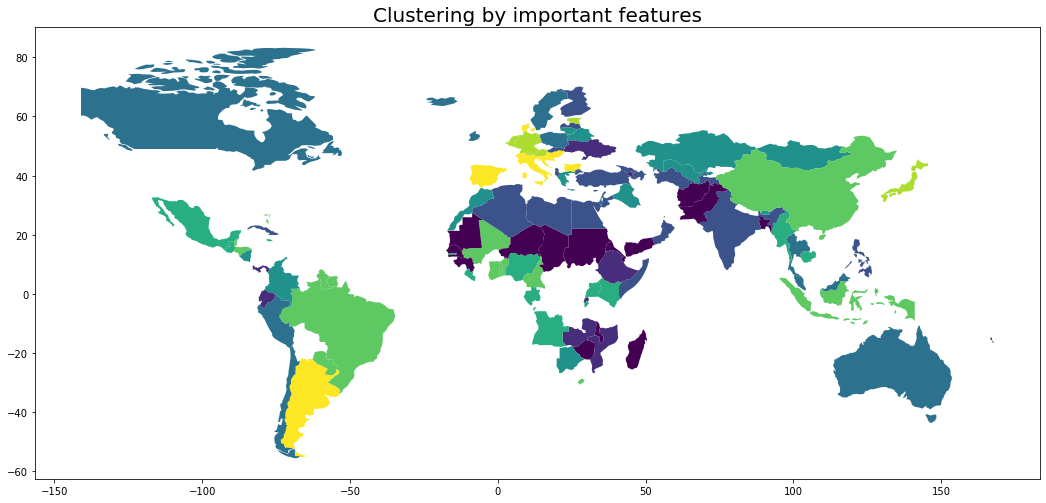

In [143]:
#visualizing clusters on the map
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 18, 18
fig, ax = plt.subplots(1, 1)
ax.set_title("Clustering by important features", fontsize=20)
world.plot(column='cluster', ax=ax);